In [1]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'],
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /home/curt/projects/python-first


In [2]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import geomstats.backend as gs
import geomstats.visualization as visualization

INFO: Using numpy backend


In [3]:
import geomstats
geomstats.__version__

'2.3.1'

In [4]:
from geomstats.information_geometry.normal import NormalDistributions

normal = NormalDistributions()
fisher_metric = normal.metric

In [15]:
point_a = gs.array([1.0, 1.0])
point_b = gs.array([3.0, 1.0])

geodesic_ab_fisher = fisher_metric.geodesic(point_a, point_b)

n_points = 5
t = gs.linspace(0, 1, n_points)

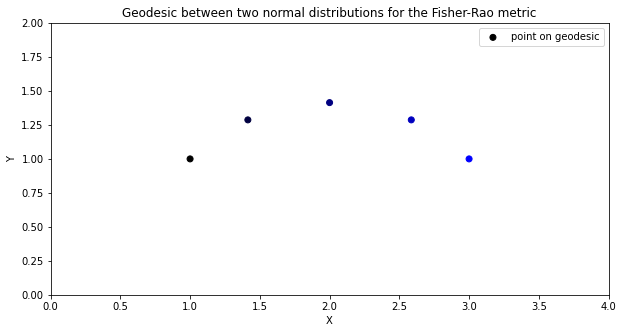

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)

visualization.plot(
    geodesic_ab_fisher(t),
    ax=ax,
    space="H2_poincare_half_plane",
    label="point on geodesic",
    color=cc,
)

ax.set_xlim(0.0, 4.0)
ax.set_ylim(0.0, 2.0)
ax.set_title("Geodesic between two normal distributions for the Fisher-Rao metric")
ax.legend();

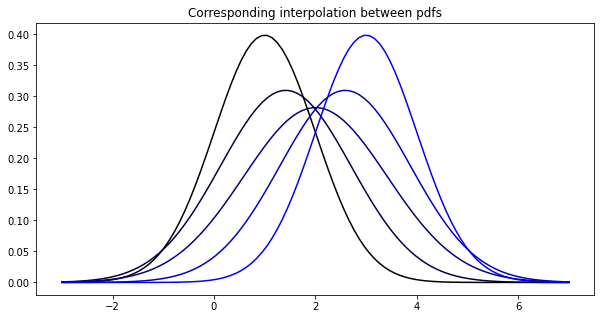

In [17]:
pdfs = normal.point_to_pdf(geodesic_ab_fisher(t))
x = gs.linspace(-3.0, 7.0, 100)

fig = plt.figure(figsize=(10, 5))
for i in range(n_points):
    plt.plot(x, pdfs(x)[:, i], color=cc[i, :])
plt.title("Corresponding interpolation between pdfs");

In [8]:
from geomstats.geometry.euclidean import Euclidean

plane = Euclidean(2)
wasserstein_metric = plane.metric

point_c = gs.array([1.0, 3.0])
point_d = gs.array([3.0, 3.0])

geodesic_cd_fisher = fisher_metric.geodesic(point_c, point_d)
geodesic_ab_wasserstein = wasserstein_metric.geodesic(point_a, point_b)
geodesic_cd_wasserstein = wasserstein_metric.geodesic(point_c, point_d)

points = gs.stack((point_a, point_b, point_c, point_d))
pdfs = normal.point_to_pdf(points)

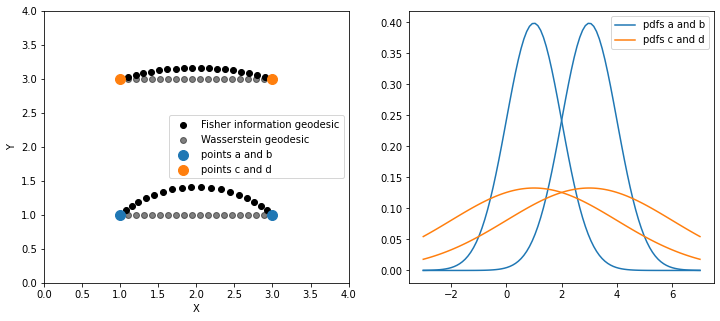

In [9]:
%matplotlib inline

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)

visualization.plot(
    gs.vstack((geodesic_ab_fisher(t), geodesic_cd_fisher(t))),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="Fisher information geodesic",
    color="black",
)
visualization.plot(
    gs.vstack((geodesic_ab_wasserstein(t), geodesic_cd_wasserstein(t))),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="Wasserstein geodesic",
    color="black",
    alpha=0.5,
)
visualization.plot(
    gs.stack((point_a, point_b)),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="points a and b",
    s=100,
)
visualization.plot(
    gs.stack((point_c, point_d)),
    ax=ax1,
    space="H2_poincare_half_plane",
    label="points c and d",
    s=100,
)

ax1.set_xlim(0.0, 4.0)
ax1.set_ylim(0.0, 4.0)
ax1.legend()

ax2 = fig.add_subplot(122)
x = gs.linspace(-3.0, 7.0, 100)
lines = [Line2D([0], [0], color="C0"), Line2D([0], [0], color="C1")]
ax2.plot(x, pdfs(x)[:, :2], c="C0")
ax2.plot(x, pdfs(x)[:, 2:], c="C1")
ax2.legend(lines, ["pdfs a and b", "pdfs c and d"]);

## Beta Distribution

In [18]:
from geomstats.information_geometry.beta import BetaDistributions

beta = BetaDistributions()

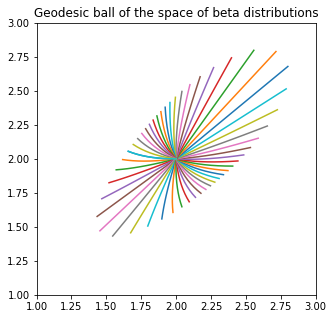

In [19]:
n_rays = 50
center = gs.array([2.0, 2.0])
theta = gs.linspace(-gs.pi, gs.pi, n_rays)
directions = gs.transpose(gs.stack((gs.cos(theta), gs.sin(theta))))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ray_length = 0.25
direction_norms = beta.metric.squared_norm(directions, center) ** (1 / 2)
unit_vectors = directions / gs.expand_dims(direction_norms, 1)
initial_vectors = ray_length * unit_vectors

n_points = 10
t = gs.linspace(0.0, 1.0, n_points)
for j in range(n_rays):
    geod = beta.metric.geodesic(
        initial_point=center, initial_tangent_vec=initial_vectors[j, :]
    )
    ax.plot(*gs.transpose(gs.array([geod(k) for k in t])))
ax.set_xlim(1, 3)
ax.set_ylim(1, 3)
ax.set_title("Geodesic ball of the space of beta distributions");

In [20]:
import geomstats.datasets.utils as data_utils

beta_param, distrib_type = data_utils.load_leaves()

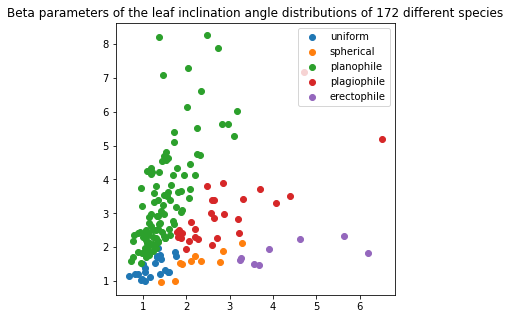

In [21]:
fig = plt.figure(figsize=(5, 5))
for distrib in set(distrib_type):
    points = beta_param[distrib_type == distrib, :]
    plt.plot(points[:, 0], points[:, 1], "o", label=distrib)
plt.title(
    "Beta parameters of the leaf inclination angle distributions of 172 different species"
)
plt.legend();

In [22]:
from geomstats.learning.frechet_mean import FrechetMean

points_plan = beta_param[distrib_type == "planophile", :]

mean = FrechetMean(metric=beta.metric)
mean.fit(points_plan)

mean_estimate = mean.estimate_

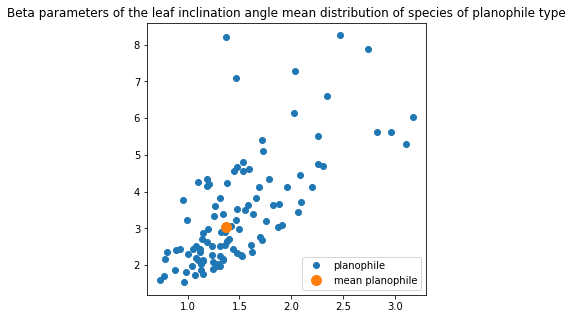

In [23]:
fig = plt.figure(figsize=(5, 5))
plt.plot(points_plan[:, 0], points_plan[:, 1], "o", label="planophile")
plt.plot(*mean_estimate, "o", markersize=10, label="mean planophile")
plt.title(
    "Beta parameters of the leaf inclination angle mean distribution "
    "of species of planophile type"
)
plt.legend();